In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd

In [2]:
def get_returns(input_file):
    returns = pd.read_csv(input_file, index_col='Date', parse_dates=['Date']).iloc[2:, :]
    print('Number of NaNs: {}'.format(returns.isna().sum().sum())+ ' after cleaning')
    return returns

In [6]:
ls GPLVM/Y_hat10-2

Y_hat/


In [10]:
models = {0:'linear', 1:'sq', 2:'exp', 3:'mat32', 4:'mat52'}
Q_max, N = 12, 60
path_gplvm_comp = f'GPLVM/comp10-2/'
path_gplvm_yhat = f'GPLVM/Y_hat10-2/'
path_studt_comp = f'StudT/comp10/'
path_studt_yhat = f'StudT/Y_hat10/'

data_gplvm, data_studt = {}, {}
for q in range(1, Q_max+1):
    for model_n in models.keys():
        data_gplvm[f'Q{q}_M{model_n}'] = pd.read_csv(path_gplvm_comp+f'comp_Q{q}_no{model_n}.csv')
        data_studt[f'Q{q}_M{model_n}'] = pd.read_csv(path_studt_comp+f'comp_Q{q}_no{model_n}.csv')

returns = get_returns('returns10.csv')
Y = returns.T.values
N,D=Y.shape
Y_T = pd.DataFrame(Y, index=range(1,N+1), columns = range(1,D+1))

Yhat_gplvm, Yhat_studt = {}, {}
for q in range(1,Q_max+1):
    for model_n in models.keys():
        Yhat_gplvm[f'Q{q}_M{model_n}'] = pd.read_csv(path_gplvm_yhat+f'Y_hat_Q{q}_no{model_n}.csv')
        Yhat_studt[f'Q{q}_M{model_n}'] = pd.read_csv(path_studt_yhat+f'Y_hat_Q{q}_no{model_n}.csv')

Number of NaNs: 0 after cleaning


In [11]:
print(data_gplvm['Q1_M0'].shape)
data_gplvm['Q1_M0'].head()

(60, 4)


,N,R_2,slope,intercept
0,0,0.536227,1.013732,0.000301
1,1,0.388338,1.033681,-0.000249
2,2,0.434331,1.038710,-0.000112
3,3,0.732316,1.026040,-0.000380
4,4,0.358352,1.020884,0.000246


In [12]:
print(Yhat_gplvm['Q1_M0'].shape)
Yhat_gplvm['Q1_M0'].head()

(60, 754)


,1,2,3,4,5,6,7,8,9,10,...,745,746,747,748,749,750,751,752,753,754
0,0.000788,0.000774,-0.000516,0.003880,0.002794,-0.009736,0.009207,0.000388,-0.009821,0.012818,...,0.011150,0.009749,-0.004512,0.006273,-0.007111,-0.001546,-0.005919,-0.002153,-0.009450,0.012903
1,0.000663,0.000652,-0.000434,0.003270,0.002354,-0.008201,0.007757,0.000329,-0.008273,0.010798,...,0.009395,0.008214,-0.003801,0.005284,-0.005992,-0.001303,-0.004986,-0.001814,-0.007961,0.010870
2,0.001179,0.001162,-0.000775,0.005829,0.004195,-0.014619,0.013827,0.000585,-0.014748,0.019248,...,0.016745,0.014641,-0.006776,0.009420,-0.010681,-0.002322,-0.008888,-0.003234,-0.014191,0.019376
3,0.001179,0.001157,-0.000765,0.005780,0.004171,-0.014506,0.013723,0.000581,-0.014636,0.019102,...,0.016618,0.014529,-0.006723,0.009348,-0.010599,-0.002304,-0.008820,-0.003210,-0.014084,0.019230
4,0.000493,0.000483,-0.000331,0.002458,0.001769,-0.006164,0.005823,0.000241,-0.006214,0.008116,...,0.007052,0.006165,-0.002857,0.003969,-0.004504,-0.000976,-0.003744,-0.001365,-0.005981,0.008165


# Scatter Plots Data - Predictions

In [13]:
def my_plot_joint(axes, Q, model_numbers, data, **kwargs):
    for model_n in model_numbers:
        ax = axes[model_n]
        sns.jointplot(x=Y_T.iloc[1,:], y=data[f'Q{Q}_M{model_n}'].iloc[1,:], ax=ax, kind="reg", truncate=False)
        ax.set_title(f'scatterplot Q={Q} M={model_n}')
        ax.set_xlabel('Data')
        ax.set_ylabel('Predictions')
        if 'xlim' in kwargs.keys(): ax.set_xlim(kwargs['xlim'])

def scatter(Q, data, model_numbers, **kwargs):
    n_cols = 3
    n_rows = Q%3+1
    fig, axes = sns.FacetGrid()
    #ax = axes[row, col]
    if kwargs.get('gplvm') is not None:
        my_plot_joint(axes, Q, model_numbers, Yhat_gplvm, postlabel='-gplvm', **kwargs)
    if kwargs.get('studt') is not None:
        my_plot_joint(axes, Q, model_numbers, Yhat_studt, postlabel='-studt', **kwargs)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

In [14]:
def quick_comp_plot(predictions, datas, Q, model_numbers, models, StudT):
    fig = plt.figure(figsize=(20,20))
    for model_n in model_numbers:
        predictions_ = predictions[f'Q{Q}_M{model_n}']
        sns.jointplot(x=predictions_.iloc[5,:], y=datas.iloc[5,:], kind="reg", truncate=False, space=0.5)
        plt.title(f'scatterplot data vs pred {models[model_n]}', loc='center')
        plt.xlabel('Predictions')
        plt.ylabel('Observations/Data', labelpad=0.02)
        if StudT==True:
            plt.savefig(f'plot_Q{Q}_no{model_n}-studt.png')
        else:
            plt.savefig(f'plot_Q{Q}_no{model_n}-gplvm.png')
        plt.close()
    n_cols = 3
    n_rows = (len(model_numbers)-1)//3+1
    fig1, axes = plt.subplots(n_rows, n_cols, figsize=(100,100))
    for model_n in model_numbers:
        col = model_n%n_cols
        row = model_n//n_cols
        if StudT==True:
            axes[row][col].imshow(mpimg.imread(f'plot_Q{Q}_no{model_n}-studt.png'))
        else:
            axes[row][col].imshow(mpimg.imread(f'plot_Q{Q}_no{model_n}-gplvm.png'))
        axes[row][col].axis('off')
    
    for model_n in range(n_cols * n_rows):
        if model_n >= len(model_numbers):
            col = model_n%n_cols
            row = model_n//n_cols
            fig1.delaxes(axes[row][col])
        
model_numbers=[0,1,2,3,4]
models = {0:'linear', 1:'sq', 2:'exp', 3:'mat32', 4:'mat52'}
Q=3

<Figure size 1440x1440 with 0 Axes>

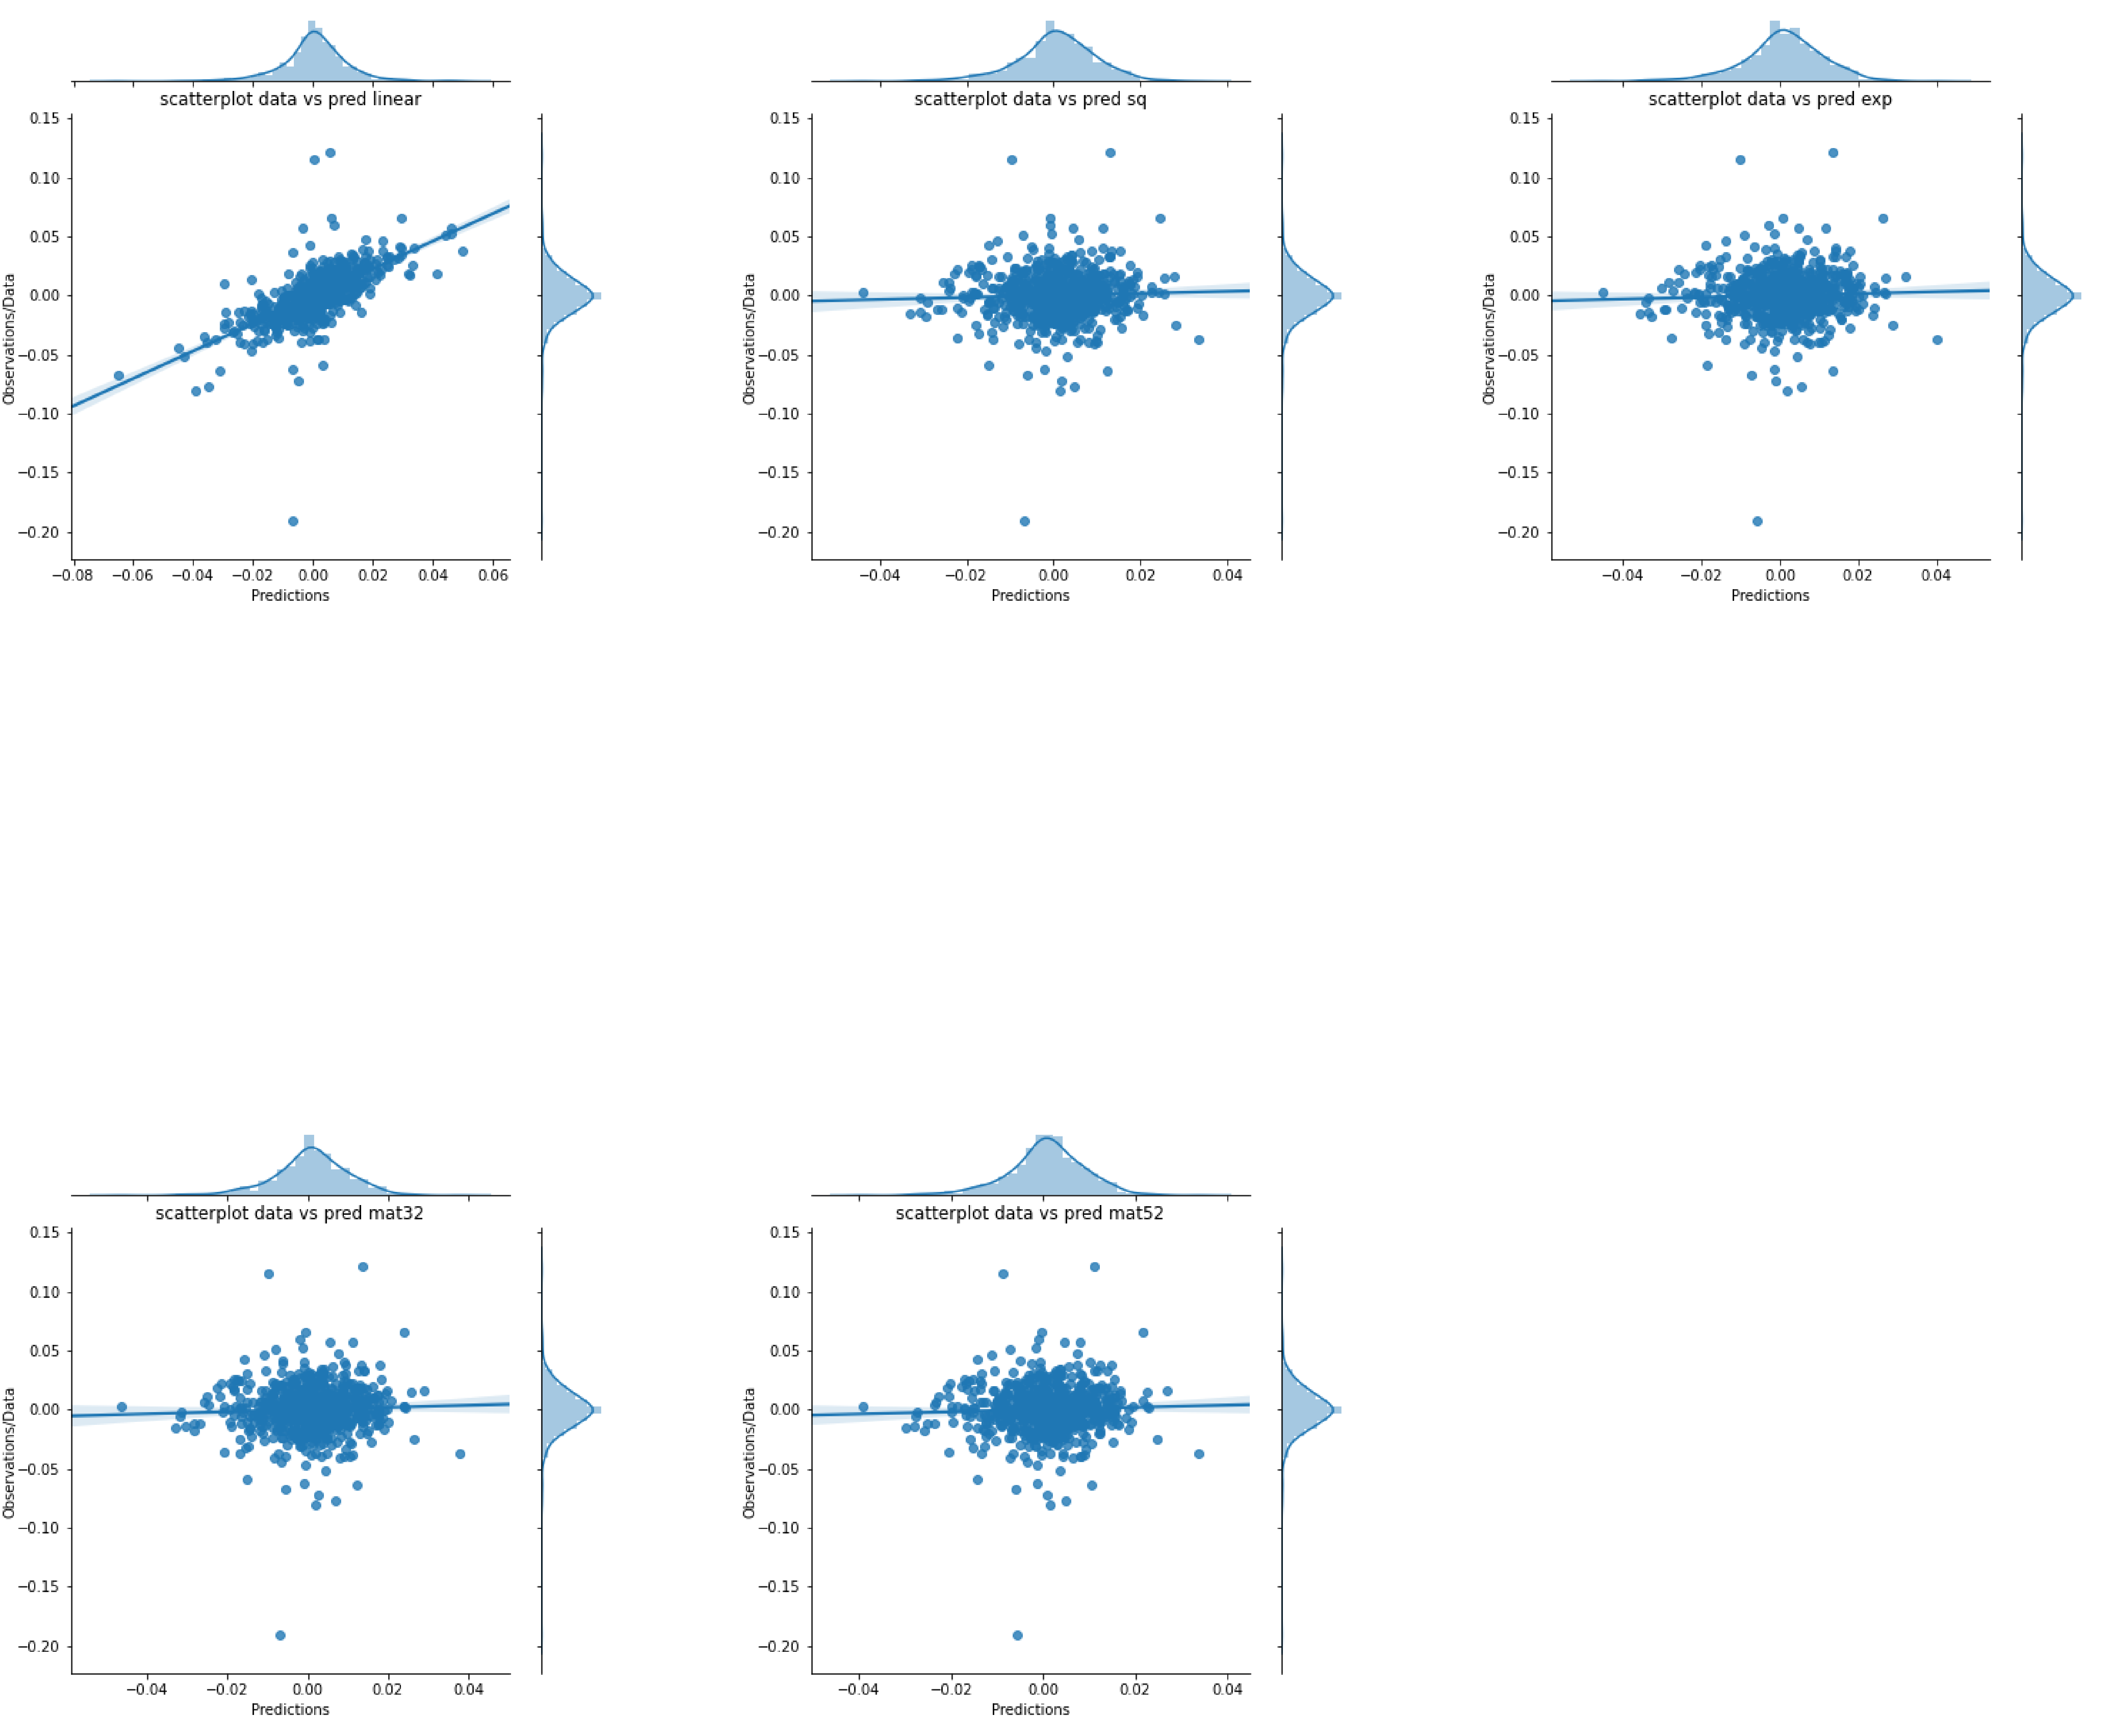

In [15]:
quick_comp_plot(Yhat_gplvm, Y_T, Q, model_numbers, models, StudT=False)

<Figure size 1440x1440 with 0 Axes>

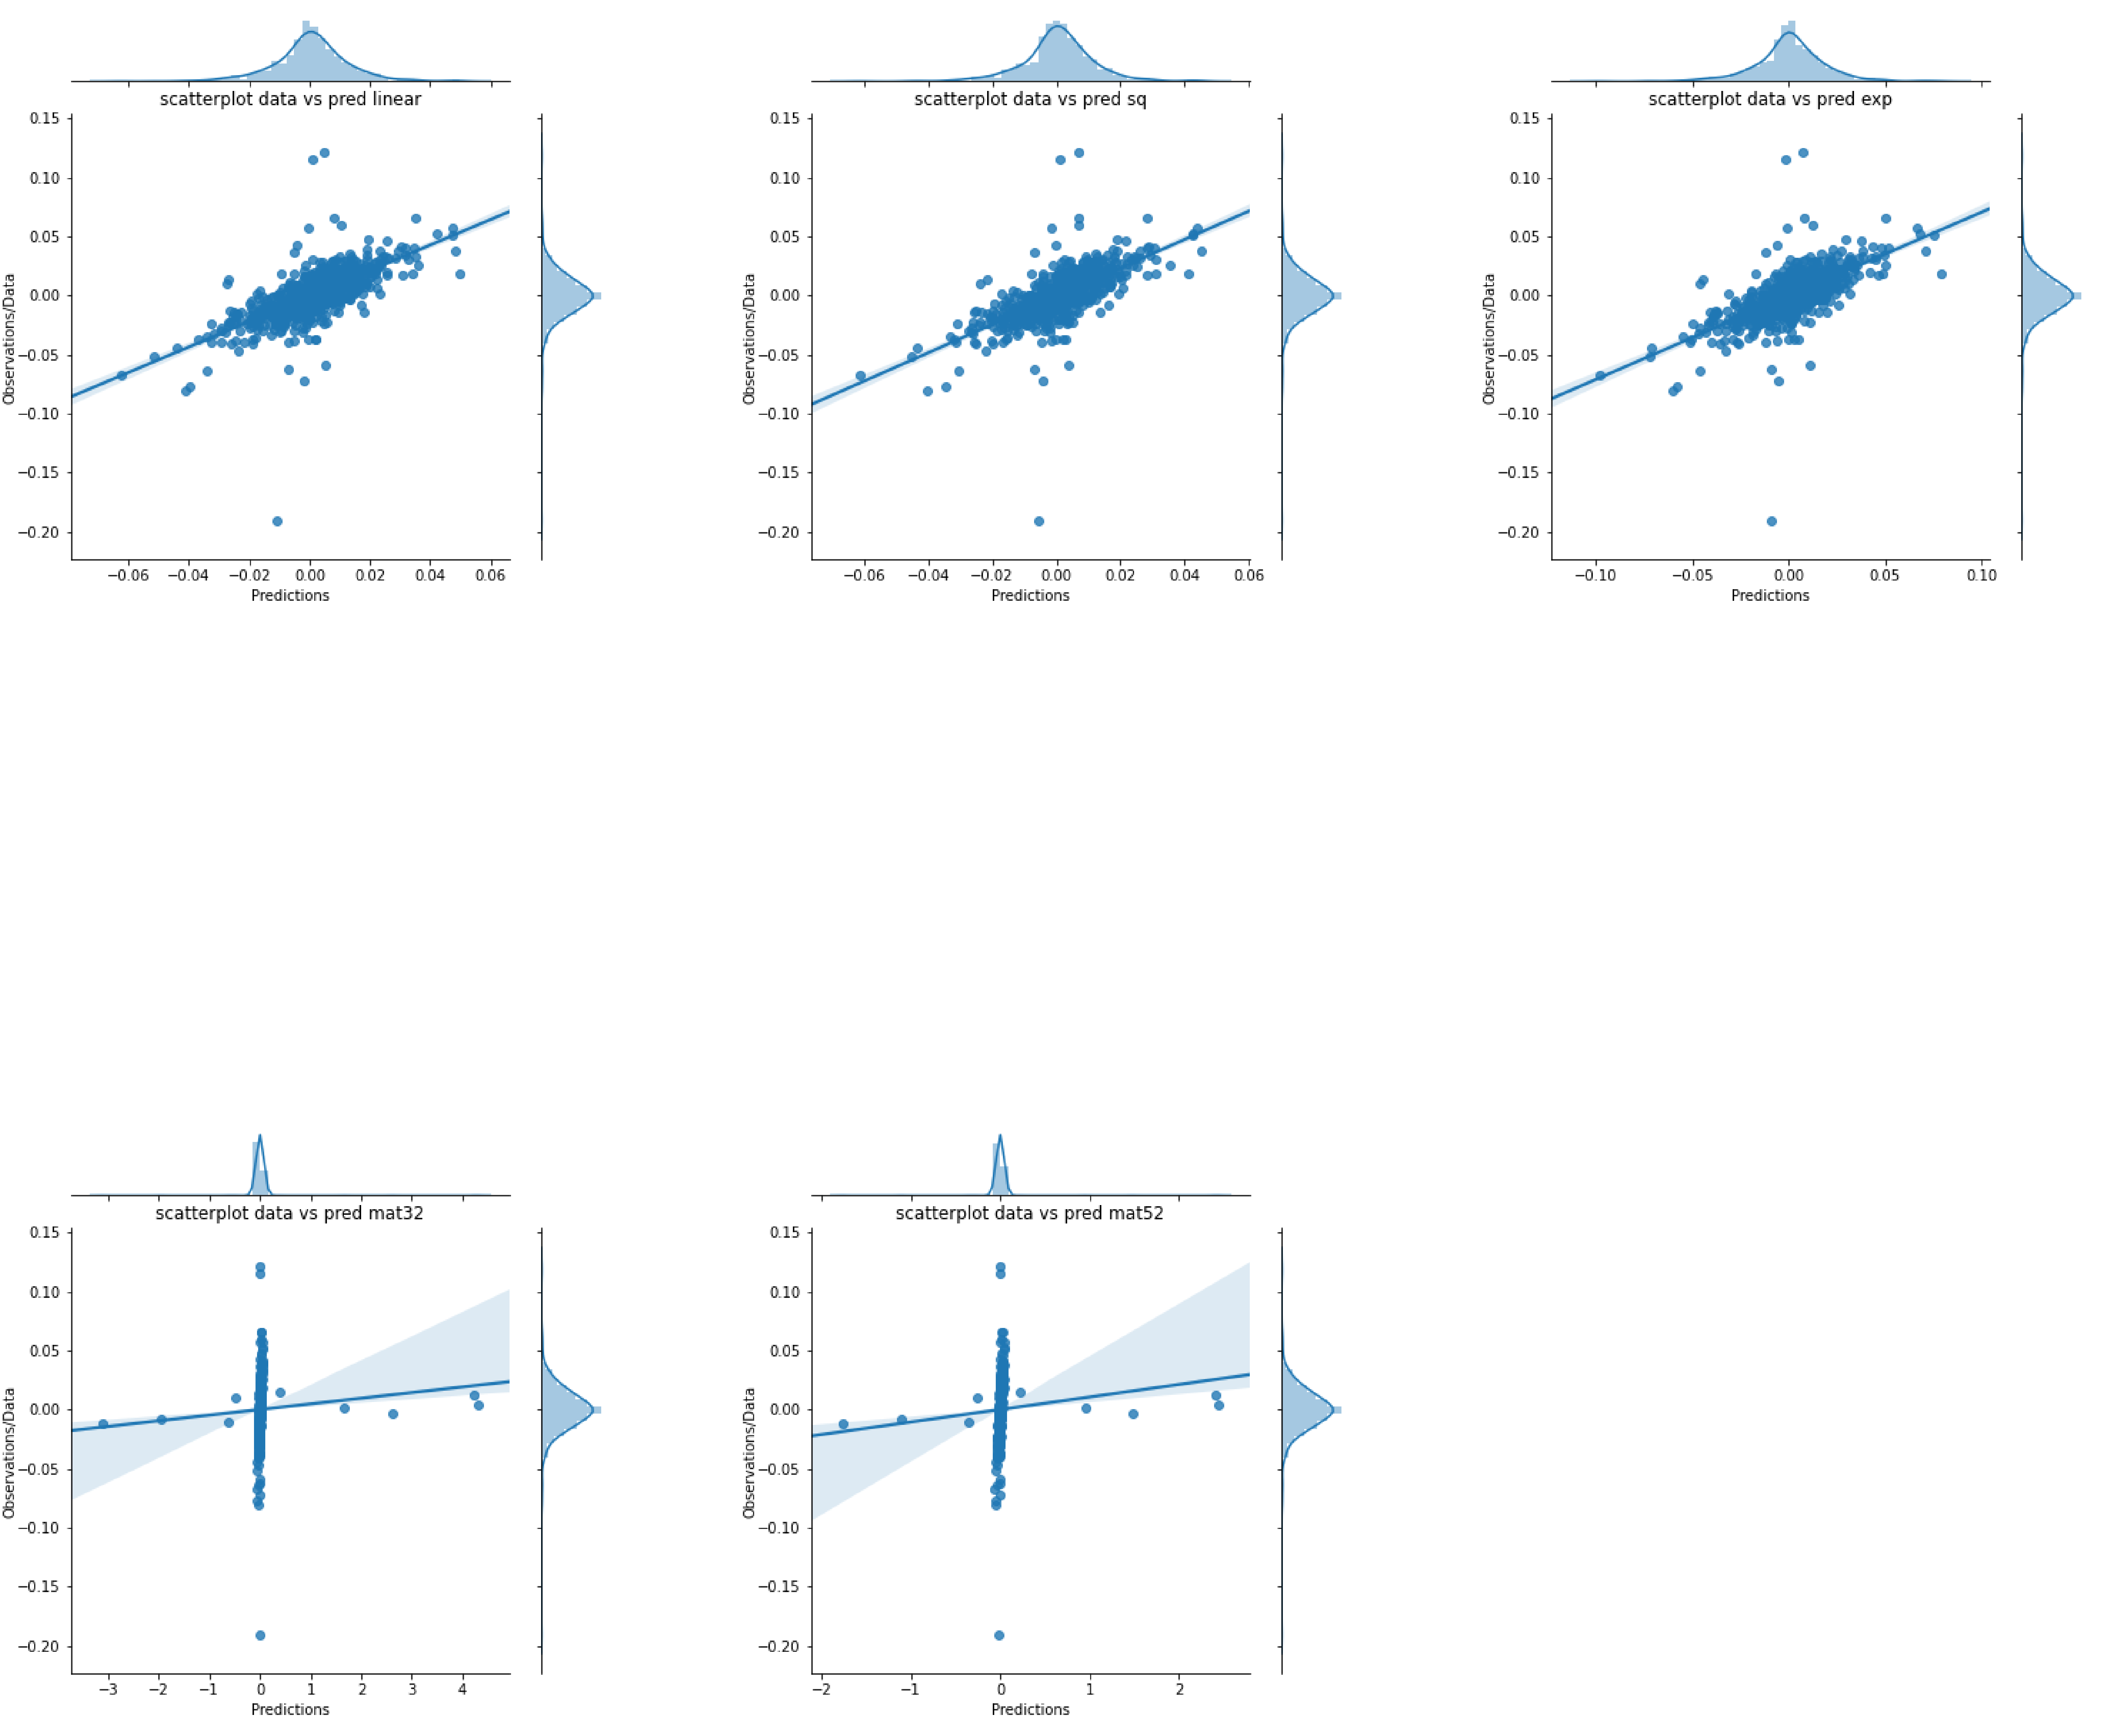

In [16]:
quick_comp_plot(Yhat_studt, Y_T, Q, model_numbers, models, StudT=True)

# Intercept und Slope Verteilungen

In [17]:
def my_plot_dist(ax, Q, model_numbers, data, variable, **kwargs):
    for model_n in model_numbers:
        sns.distplot(data[f'Q{Q}_M{model_n}'].loc[:,variable], ax=ax, 
                     norm_hist=True, hist=False, 
                     label=models[model_n]+kwargs.get('postlabel', ''))
    ax.set_title(f'{variable} Q={Q}')
    if 'vline' in kwargs.keys(): ax.axvline(x=kwargs['vline'], color='k')
    if 'xlim' in kwargs.keys(): ax.set_xlim(kwargs['xlim'])

def plot_variable(variable, model_numbers, **kwargs):
    n_cols = 3
    n_rows = Q_max//3 + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,4*n_rows))
    for Q in range(1, Q_max+1):
        col = ((Q)%n_cols)
        row = ((Q)//n_cols)
        ax = axes[row, col]
        if kwargs.get('gplvm') is not None:
            my_plot_dist(ax, Q, model_numbers, data_gplvm, variable, postlabel='-gplvm', **kwargs)
        if kwargs.get('studt') is not None:
            my_plot_dist(ax, Q, model_numbers, data_studt, variable, postlabel='-studt', **kwargs)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

## GPLVM

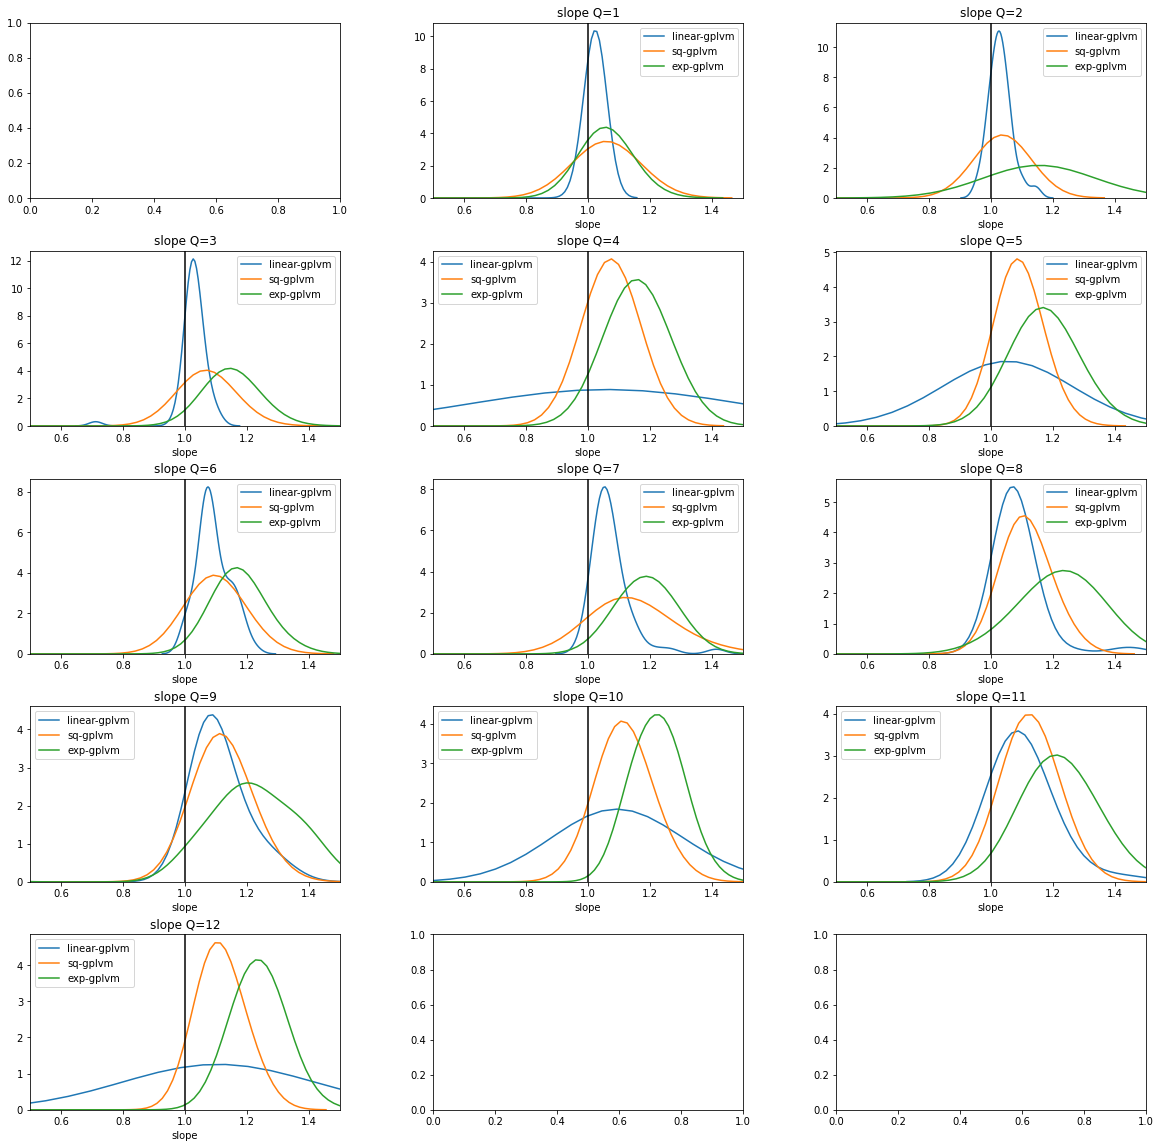

In [18]:
model_numbers = [0, 1, 2]
plot_variable('slope', model_numbers, gplvm=True, studt=None, xlim=[0.5, 1.5], vline=1.)

## StudT

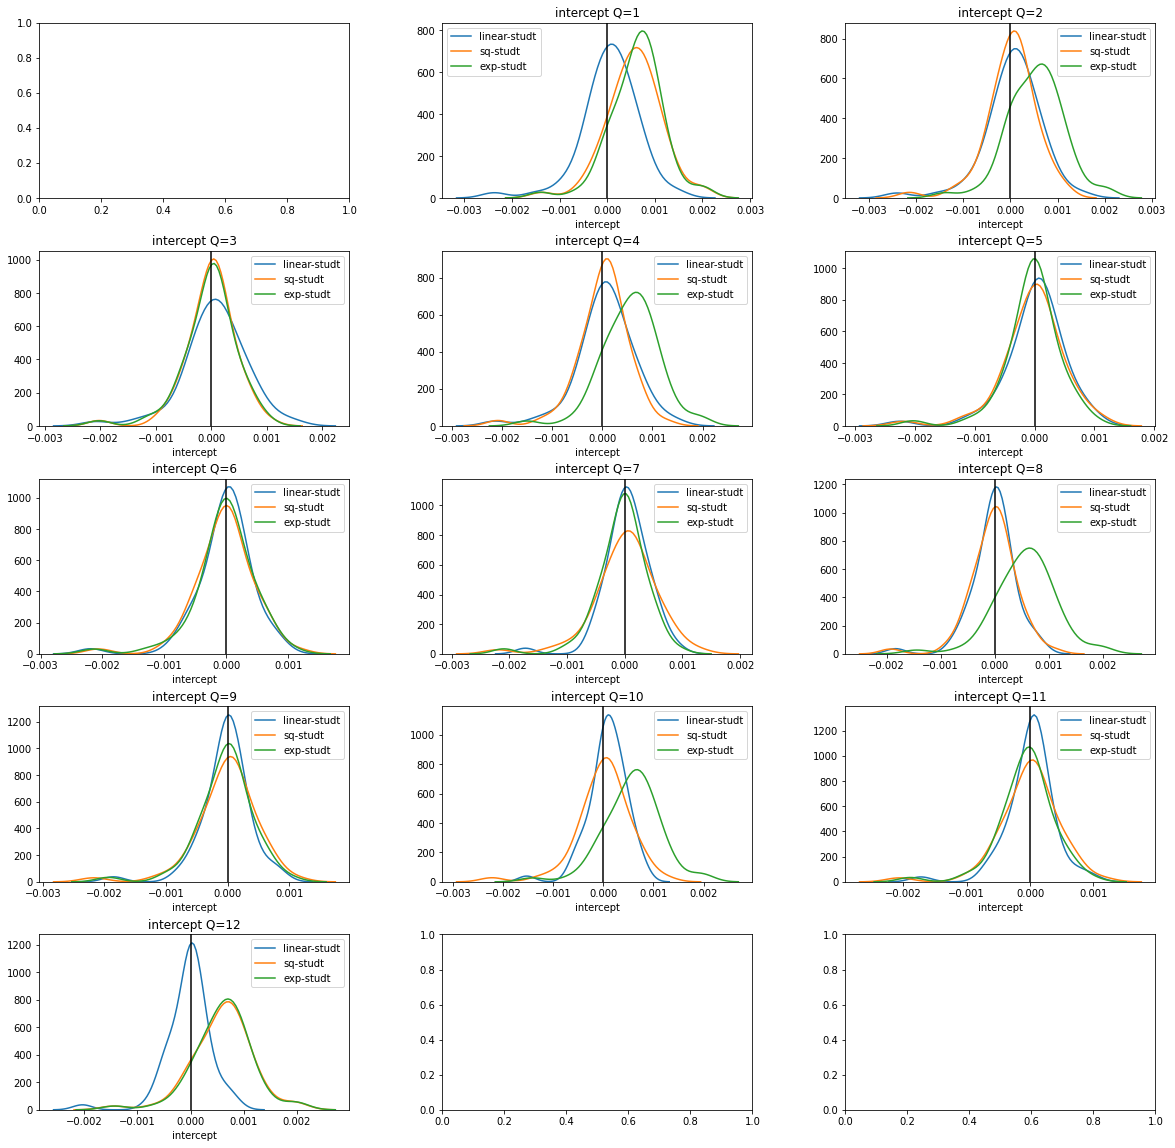

In [19]:
model_numbers = [0, 1, 2]
plot_variable('intercept', model_numbers, gplvm=None, studt=True, vline=0.)